# <img src="https://escudouchile.files.wordpress.com/2012/07/logo-economia-u-de-chile.jpg" height="250" /> 

# Introducción a Python para las Finanzas

## _&gt; Datos Bursátiles Utilizando la API de Yahoo Finance (Pauta)_

Gabriel E. Cabrera, M.Sc.<br>
<span style = 'font-size: 50%;'>Universidad de Chile<br>
Magister en Finanzas - Full Time</span>

*Otoño 2021*

> Use a picture. It’s worth a thousand words.
<br> <div align="right">— __Arthur Brisbane__ </div>

Las API (Interfaz de Programación de Aplicaciones) permiten que sus productos y servicios se comuniquen con otros, sin necesidad de saber cómo están implementados. Una API muy usada es la de Yahoo Finance, que permite al usuario utilizar y descargar datos bursátiles con distinta frecuencia. En python existe la librería `yfinance` que pemite acceder a dicha API. 

Para instalar `yfinance`:

In [1]:
!pip install yfinance 

     |████████████████████████████████| 5.5MB 6.6MB/s 
  Created wheel for yfinance: filename=yfinance-0.1.59-py2.py3-none-any.whl size=23442 sha256=6648f3d356c1739e8f611910a3dbd92aef3182a48e51db3d4b511e8d4d254071
  Stored in directory: /root/.cache/pip/wheels/f8/2a/0f/4b5a86e1d52e451757eb6bc17fd899629f0925c777741b6d04
Successfully built yfinance
  Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6


Vistar https://pypi.org/project/yfinance/ para ver la documentación de la librería. 

# API Yahoo Finance

1. Descargué la información bursátil de GameStop (`GME`) desde 2015-01-01 hasta 2021-03-01 con frecuencia diaria.

In [2]:
# importa pandas
import pandas as pd
# import numpy
import numpy as np 
# import ytfinance
import yfinance as yf 

# ticker 
asset = "GME"

# descarga la información OHCL del GameStop
gme_ohcl_daily = yf.download(asset, start = "2015-01-01", end = "2021-03-01")

[*********************100%***********************]  1 of 1 completed


2. Realice una breve estadística descriptiva que incluya: el total de observaciones, promedio, desviación estandar, mínimo, máximo, percentil 25, 50 y 75.

In [3]:
# breve estadística descriptiva
gme_ohcl_daily.apply(lambda x: x.describe())

,Open,High,Low,Close,Adj Close,Volume
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1.549000e+03
mean,21.484680,22.247779,20.595842,21.281065,17.918133,5.225534e+06
std,21.251525,24.844285,16.224997,19.061124,17.358004,1.240054e+07
min,2.850000,2.940000,2.570000,2.800000,2.800000,7.461000e+05
25%,10.370000,10.660000,10.090000,10.350000,10.350000,1.955200e+06
50%,18.510000,18.930000,18.219999,18.500000,16.148729,2.769000e+06
75%,28.530001,28.940001,28.150000,28.480000,22.403204,4.374700e+06
max,379.709991,483.000000,250.000000,347.510010,347.510010,1.971579e+08


3. Extraiga del índice el año, mes y día.

In [4]:
# se extrae año
gme_ohcl_daily['Year'] = gme_ohcl_daily.index.year
# se extrae mes
gme_ohcl_daily['Month'] = gme_ohcl_daily.index.month
# se extrae día
gme_ohcl_daily['Day'] = gme_ohcl_daily.index.day

4. Seleccione el precio al cierre (`Close`).

In [5]:
# se selecciona el adj close
gme_close_daily = gme_ohcl_daily.loc[:,['Close']]

# Cambios a través del tiempo

1. Utilizando una función lambda (anónima) genere la diferencia del precio al cierre:

  $$
  \Delta_t = p_{t} - p_{t-1}
  $$

  Donde $p_t$ es el precio al cierre en $t$ y $p_{t-1}$ el precio al cierre en $p_{t-1}$ (rezago).

In [6]:
# se aplica el método diff()
gme_close_daily['diff'] = gme_close_daily[['Close']].apply(lambda x: x.diff())

2. Utilizando una función lambda (anónima) genere el primer rezago de $p_t$.

In [7]:
# se aplica el método shift()
gme_close_daily['close_t_1'] = gme_close_daily[['Close']].apply(lambda x: x.shift(1))                                     

3. Divida la variable creada en (1) por la variable creada en (2). 

In [8]:
# se divide (1) por (2)
gme_close_daily['returns'] = gme_close_daily['diff'] / gme_close_daily['close_t_1']

4. Utilize el método `pct_change()` y compárelo con la variable creada en (3). 

In [9]:
# se utiliza el método pct_change()
gme_close_daily['pct_change'] = gme_close_daily[['Close']].apply(lambda x: x.pct_change(1))  

# Visualización Básica de Series de Tiempo

1. Grafique el precio al cierre de GameStop.

Text(0, 0.5, 'Close')

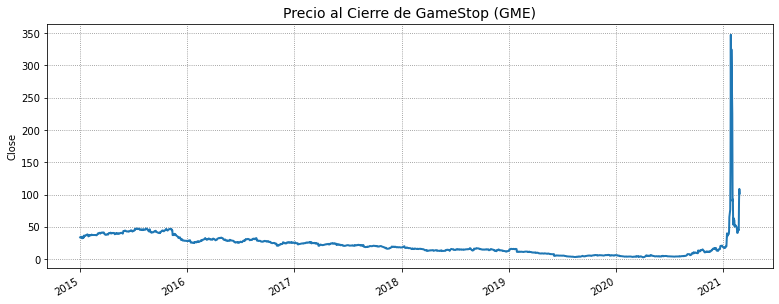

In [10]:
# importa matplotlib
import matplotlib.pyplot as plt

# gráfico de linea 
fig1 = gme_ohcl_daily.loc[:,'Close'].plot(kind='line', figsize=(13,5), lw=2) # se crea un gráfico de linea 
fig1.grid(color='grey', linestyle=':')                                       # cambia el estilo de la grilla
fig1.set_title('Precio al Cierre de GameStop (GME)', fontsize=14, y=1.00)    # agrega título
fig1.set_xlabel('')                                                          # nombre del eje x
fig1.set_ylabel('Close')                                                     # nombre del eje y                     

In [11]:
# guarda el gráfico con el nombre fig1.png
plt.savefig('fig1.png', dpi=300)

<Figure size 432x288 with 0 Axes>

## Análisis Técnico: Media Movil

1. Utilizando el precio al cierre de GameStop (`GME`) genere:

  a. El precio mínimo movil a 20 días.

  b. La media movil a 20 días (corto plazo).

  c. El precio máximo movil a 20 días.

  Elimine los `NAs` y grafique las variables creadas desde 2020-01-01 hasta 2020-09-08.  

Text(0, 0.5, 'Close')

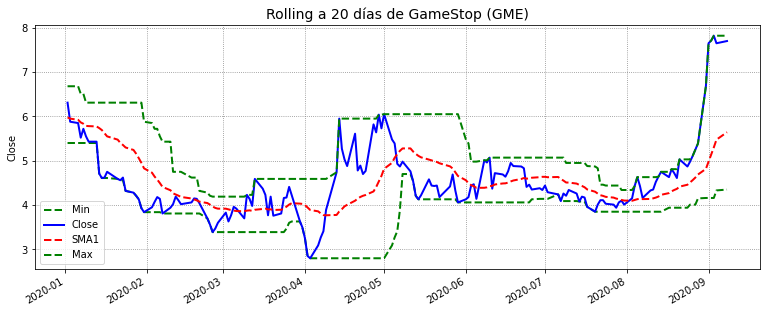

In [12]:
# selecciona precio cierre
tech_analysis = gme_ohcl_daily.loc[:,['Close']]

# mínimo movil a 20 días
tech_analysis['Min'] = gme_ohcl_daily['Close'].rolling(window=20).min()
# media movil a 20 días
tech_analysis['SMA1'] = gme_ohcl_daily['Close'].rolling(window=20).mean()
# máximo móvil a 20 días
tech_analysis['Max'] = gme_ohcl_daily['Close'].rolling(window=20).max()

# elimina NAs in-place
tech_analysis.dropna(inplace=True)

# dataframe filtrada
df2 =  tech_analysis.loc[:,['Min','Close','SMA1','Max']][(tech_analysis.index >= "2020-01-01") & (tech_analysis.index <= "2020-09-08")]

fig2 = df2.plot(figsize=(13,5), style=['g--', 'b-', 'r--', 'g--'], lw=2)   # se crea un gráfico de linea  
fig2.grid(color='grey', linestyle=':')                                     # cambia el estilo de la grilla
fig2.set_title('Rolling a 20 días de GameStop (GME)', fontsize=14, y=1.00) # agrega título
fig2.set_xlabel('')                                                        # nombre del eje x
fig2.set_ylabel('Close')                                                   # nombre del eje y 

In [13]:
# guarda el gráfico con el nombre fig2.png
plt.savefig('fig2.png', dpi=300)

<Figure size 432x288 with 0 Axes>

2. Al DataFrame creado en (1), genere:

  a. La media movil a 252 días (largo plazo).

  b. Una variable que sea igua a 1 si media movil a 20 días > media movil a 252 días, -1 caso contrario.

  Elimine los `NAs` y grafique las variables creadas desde 2020-01-01 hasta 2020-09-08.  

Text(0.5, 0.925, 'Indicador Técnico: Media Movil 20 y 252 días | GameStop (GME)')

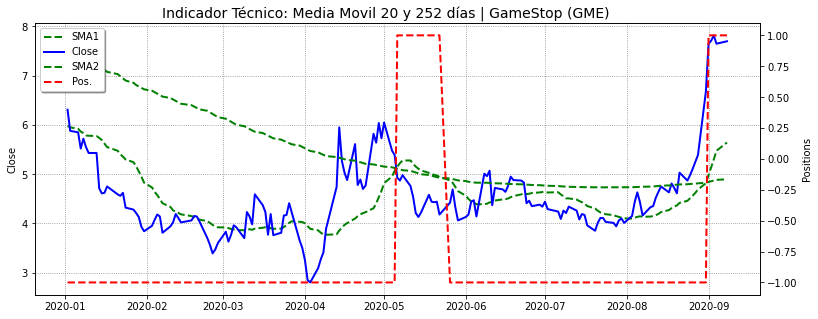

In [14]:
# media movil a 252 días
tech_analysis['SMA2'] = gme_ohcl_daily['Close'].rolling(window=252).mean()
# pisición usando np.where()
tech_analysis['Positions'] = np.where(tech_analysis['SMA1'] > tech_analysis['SMA2'], 1, -1)

# elimina NAs in-place
tech_analysis.dropna(inplace=True)

# selecciona SM1, Close, SMA2 y Positions
df3 = tech_analysis.loc[:,['SMA1','Close','SMA2','Positions']][(tech_analysis.index >= "2020-01-01") & (tech_analysis.index <= "2020-09-08")]

# fig (figura) y ax1 (axis)
fig, ax1 = plt.subplots(figsize=(13,5)) # # se crea un subplot

lns1 = ax1.plot(df3.loc[:,['SMA1']], color='green', label="SMA1", linestyle='--', lw=2) # se crea un gráfico de linea
lns2 = ax1.plot(df3.loc[:,['Close']], color='blue', label="Close", linestyle='-', lw=2) # se crea un gráfico de linea
lns3 = ax1.plot(df3.loc[:,['SMA2']], color='green', label="SMA2", linestyle='--', lw=2) # se crea un gráfico de linea

# nombre eje y
ax1.set_ylabel('Close')

# crea segundo eje que comparte el mismo eje de ax1
ax2 = ax1.twinx()  

# se crea un gráfico de linea para el eje secundario
lns4 = ax2.plot(df3.loc[:,['Positions']], color='red', label="Pos.", linestyle='--', lw=2)

# nombre eje y (secundario)
ax2.set_ylabel('Positions')

# se suman los gráfico de linea 
lns = lns1 + lns2 + lns3 + lns4
labs = [l.get_label() for l in lns] # extrae etiqueta

# configuración de la leyenda
ax1.legend(lns, labs, loc=2, facecolor="white", shadow=True)

# ajuste de la grilla
ax1.grid(color='grey', linestyle=':', axis='both')

# título
fig.suptitle('Indicador Técnico: Media Movil 20 y 252 días | GameStop (GME)', fontsize=14, y=0.925)

In [15]:
# guarda el gráfico con el nombre fig3.png
plt.savefig('fig3.png', dpi=300)

<Figure size 432x288 with 0 Axes>

3. Filtre los datos OHCL de GameStop entre 2020-01-01 y 2020-09-08. Luego utilizando la librería `plotly` grafique un *Candle-Stick* (ver https://plotly.com/python/candlestick-charts/).

In [16]:
# importa plotly
import plotly.graph_objects as go

# filtra los datos OHCL
df_plotly = gme_ohcl_daily[(gme_ohcl_daily.index >= "2020-01-01") & (gme_ohcl_daily.index <= "2020-09-08")]

# grafica candlestick
fig_plotly = go.Figure(data=[go.Candlestick(x=df_plotly.index,
                                            open=df_plotly['Open'],
                                            high=df_plotly['High'],
                                            low=df_plotly['Low'],
                                            close=df_plotly['Close'])])

# se visualiza
fig_plotly.show()

# Descargar Multiples índices

1. Utilizando la librería `yfinance`, descargue con frecuencia mensual la información OHCL desde 2000-01-01 hasta 2021-03-01 de los siguientes índices bursátiles: Facebook (`FB`), Amazon (`AMZN`), Apple (`AAPL`), Netflix (`NFLX`) y Google (`GOOG`).

In [17]:
# tickers a descargar
tickers = ['FB', 'AMZN', 'AAPL', 'NFLX', 'GOOG']

# se descarga y se guarda en un diccionario
FAANG = {i: yf.download(i, start = "2000-01-01", end = "2021-03-01", interval='1mo') for i in tickers}
# cada precio al cierre lo pasa a una lista
FAANG_Close = [k[['Close']].dropna().rename(columns={'Close':j}) for j, k in FAANG.items()]

# concatena cada DataFrame por índice (basado en la columna)
df_concat = pd.concat(FAANG_Close, axis=1)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


2. Grafique la evolución de los precios para todos los índices.  

Text(0, 0.5, 'Close')

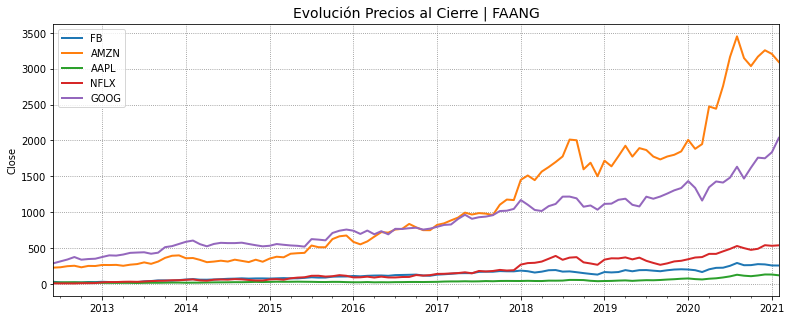

In [18]:
fig4 = df_concat.dropna().plot(figsize=(13,5), lw=2)                       # se crea un gráfico de linea 
fig4.grid(color='grey', linestyle=':')                                     # cambia el estilo de la grilla
fig4.set_title('Evolución Precios al Cierre | FAANG', fontsize=14, y=1.00) # agrega título
fig4.set_xlabel('')                                                        # nombre del eje x
fig4.set_ylabel('Close')                                                   # nombre del eje y 

In [19]:
# guarda el gráfico con el nombre fig4.png
plt.savefig('fig4.png', dpi=300)

<Figure size 432x288 with 0 Axes>

3. Realice un *reshape* al DataFrame generado en (1) de manera que las columnas queden en las filas.

In [20]:
# de columnas a filas
df_melted = df_concat.melt(var_name="Symbol", value_name="Close", ignore_index=False)

# se verifica el df
df_melted

,Symbol,Close
Date,,
2000-01-01,FB,NaN
2000-02-01,FB,NaN
2000-03-01,FB,NaN
2000-04-01,FB,NaN
2000-05-01,FB,NaN
...,...,...
2020-10-01,GOOG,1621.010010
2020-11-01,GOOG,1760.739990
2020-12-01,GOOG,1751.880005


4. Devuelva el DataFrame anterior a su forma original.

In [21]:
# de filas a columnas
df_pivoted = df_melted.pivot(columns='Symbol', values='Close')

# se verifica el df
df_pivoted

Symbol,AAPL,AMZN,FB,GOOG,NFLX
Date,,,,,
2000-01-01,0.926339,64.562500,NaN,NaN,NaN
2000-02-01,1.023438,68.875000,NaN,NaN,NaN
2000-03-01,1.212612,67.000000,NaN,NaN,NaN
2000-04-01,1.107701,55.187500,NaN,NaN,NaN
2000-05-01,0.750000,48.312500,NaN,NaN,NaN
...,...,...,...,...,...
2020-10-01,108.860001,3036.149902,263.109985,1621.010010,475.739990
2020-11-01,119.050003,3168.040039,276.970001,1760.739990,490.700012
2020-12-01,132.690002,3256.929932,273.160004,1751.880005,540.729980
